## Data Wrangling with Pandas

**[Pandas](http://pandas.pydata.org)** is a Python library that provides extensive means for data analysis. Data scientists often work with data stored in table formats like `.csv`, `.tsv`, or `.xlsx`. Pandas makes it very convenient to load, process, and analyze such tabular data using SQL-like queries. In conjunction with `Matplotlib` and `Seaborn`, `Pandas` provides a wide range of opportunities for visual analysis of tabular data. 

The main data structures in `Pandas` are implemented with **Series** and **DataFrame** classes. The former is a one-dimensional indexed array of some fixed data type. The latter is a two-dimensional data structure - a table - where each column contains data of the same type. You can see it as a dictionary of `Series` instances. `DataFrames` are great for representing real data: rows correspond to instances (examples, observations, etc.), and columns correspond to features of these instances.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

** Get to know your data **

We’ll demonstrate the main methods in action by analyzing a sample dataset provided by PGGM. Let’s read the data (using `read_csv`), and take a look at the first 5 lines using the `head` method:

In [2]:
data = pd.read_csv('http://bit.ly/PGGM_dataset')

** Shape of the data **

In [10]:
data.shape

(38304, 18)

In [11]:
data.head()

,Identifier,Name,Period,Period_YYYYMMDD,Ticker,Universe_Returns_F1W,Universe_Returns_F4W,Universe_Returns_F12W,Weight,GICS_Sector,GICS_Ind_Grp,Market_Cap_USD,Price_USD,NTM_EP,LTM_ROA,BP,LTM_EP,5Y_Sales_Growth
0,17290810,Cintas Corporation,12/31/2014,20141231,CTAS-US,-2.517855,-0.121111,4.156041,0.000402,Industrials,Commercial & Professional Services,7761.120,78.44,0.044387,9.089989,0.246962,0.042708,4.718765
1,80589M10,SCANA Corporation,12/31/2014,20141231,SCG-US,2.036428,6.307948,-8.426744,0.000422,Utilities,Utilities,8151.001,60.40,0.061397,3.472852,0.572871,0.062748,-0.949881
2,50241310,L-3 Communications Holdings Inc.,12/31/2014,20141231,LLL-US,-0.396162,-1.283580,-0.753021,0.000563,Industrials,Capital Goods,10883.341,126.21,0.060554,4.744629,0.570099,0.059821,-4.316938
3,91301710,United Technologies Corporation,12/31/2014,20141231,UTX-US,-1.973909,1.669562,1.815629,0.005174,Industrials,Capital Goods,99942.990,115.00,0.062889,6.805052,0.325584,0.059088,3.083364
4,92939U10,Wisconsin Energy Corporation,12/31/2014,20141231,WEC-US,1.118696,7.679176,-6.160975,0.000616,Utilities,Utilities,11893.872,52.74,0.051359,4.201019,0.369798,0.050815,1.421392


In [9]:
data.describe()

,Period_YYYYMMDD,Universe_Returns_F1W,Universe_Returns_F4W,Universe_Returns_F12W,Weight,Market_Cap_USD,Price_USD,NTM_EP,LTM_ROA,BP,LTM_EP,5Y_Sales_Growth
count,3.830400e+04,38300.000000,38296.000000,38268.000000,38304.000000,3.830400e+04,38304.000000,38246.000000,38245.000000,38288.000000,38215.000000,38197.000000
mean,2.017809e+07,0.037778,-0.025070,-0.534635,0.001593,3.828089e+04,111.173980,0.060218,5.842138,0.365269,0.039273,16.717226
std,7.340507e+03,3.982946,7.509304,11.969478,0.003048,7.374643e+04,178.296736,0.031881,7.245260,0.308932,0.056394,312.939623
min,2.014123e+07,-47.561474,-67.705421,-68.235580,0.000069,1.432547e+03,3.410000,-0.346678,-80.447959,-0.896646,-1.689621,-100.000000
25%,2.018021e+07,-1.843239,-4.256311,-7.583998,0.000403,9.659986e+03,45.170000,0.042177,1.739803,0.151267,0.020475,0.497268
50%,2.018053e+07,0.277680,0.329203,-0.362670,0.000652,1.568286e+04,73.820000,0.057110,4.923546,0.292937,0.040028,5.253313
75%,2.018091e+07,2.159980,4.400995,6.686374,0.001454,3.509461e+04,123.830000,0.076561,9.015668,0.504965,0.059893,11.886979
max,2.018123e+07,46.864033,63.502525,114.599991,0.044994,1.140656e+06,3646.690000,0.345388,64.735065,3.589774,0.383827,14039.748000


Let’s have a look at data dimensionality, features names, and feature types.

In [ ]:
df.shape

(18, 24)

From the output, we can see that the table contains 18 rows and 24 columns.

Now let’s try printing out column names using `columns`:

In [ ]:
df.columns

Index(['Sedol', 'Naam', 'Sector', 'Land', '11/01/2018', '11/02/2018',
       '11/05/2018', '11/06/2018', '11/07/2018', '11/08/2018', '11/09/2018',
       '11/12/2018', '11/13/2018', '11/14/2018', '11/15/2018', '11/16/2018',
       '11/19/2018', '11/20/2018', '11/21/2018', '11/22/2018', '11/23/2018',
       '11/26/2018', '11/27/2018', '11/28/2018'],
      dtype='object')

We can use the `info()` method to output some general information about the dataframe:

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18 entries, 0 to 17
Data columns (total 24 columns):
Sedol         18 non-null object
Naam          18 non-null object
Sector        18 non-null object
Land          18 non-null object
11/01/2018    18 non-null float64
11/02/2018    18 non-null float64
11/05/2018    18 non-null float64
11/06/2018    18 non-null float64
11/07/2018    18 non-null float64
11/08/2018    18 non-null float64
11/09/2018    18 non-null float64
11/12/2018    18 non-null float64
11/13/2018    18 non-null float64
11/14/2018    18 non-null float64
11/15/2018    18 non-null float64
11/16/2018    18 non-null float64
11/19/2018    18 non-null float64
11/20/2018    18 non-null float64
11/21/2018    18 non-null float64
11/22/2018    18 non-null float64
11/23/2018    18 non-null float64
11/26/2018    18 non-null float64
11/27/2018    18 non-null float64
11/28/2018    18 non-null float64
dtypes: float64(20), object(4)
memory usage: 3.5+ KB


`bool`, `int64`, `float64` and `object` are examples of data types of our features. We see that 4 features are of type `object`, and 20 features are numeric decimals. With this same method, we can easily see if there are any missing values. Here, there are none because each column contains 18 observations, the same number of rows we saw before with `shape`. 

The describe method shows basic statistical characteristics of each numerical feature (int64 and float64 types): number of non-missing values, mean, standard deviation, range, median, 0.25 and 0.75 quartiles.

In [ ]:
df.describe()

,11/01/2018,11/02/2018,11/05/2018,11/06/2018,11/07/2018,11/08/2018,11/09/2018,11/12/2018,11/13/2018,11/14/2018,11/15/2018,11/16/2018,11/19/2018,11/20/2018,11/21/2018,11/22/2018,11/23/2018,11/26/2018,11/27/2018,11/28/2018
count,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000
mean,-0.276188,2.175926,-0.810360,0.186244,0.376049,0.406730,-0.074694,0.111710,-0.773645,-0.197100,0.384455,0.598853,0.405907,-1.188897,0.498710,-1.167712,-0.584723,1.657749,1.206519,0.829925
std,1.719490,2.204103,1.260146,1.037247,1.970096,1.540740,1.229270,2.333321,1.683368,1.224229,2.389488,2.839930,1.325920,2.053318,1.501743,3.030650,4.007661,2.619705,2.263537,3.037940
min,-3.827751,-1.219511,-4.166669,-1.449275,-2.214450,-2.158272,-3.292906,-4.659492,-5.000000,-3.101736,-3.237408,-3.717470,-1.885015,-5.617976,-1.450366,-11.831683,-12.240314,-4.624277,-1.449275,-6.097561
25%,-1.731059,0.553226,-1.187363,-0.261323,-0.421929,-0.684959,-0.602302,-0.502136,-1.295484,-0.975178,-0.533234,-0.775000,-0.358580,-2.997997,-0.174741,-1.253043,-1.078133,0.395414,-0.054221,-0.187661
50%,0.000000,2.191686,-0.471601,0.000000,0.000000,0.121069,0.000000,-0.100201,-0.380185,0.000000,0.000000,0.000000,0.000000,-0.086805,0.253189,-0.640759,-0.179210,1.510489,0.729203,0.096244
75%,0.695539,3.454912,-0.167285,0.720784,0.926402,1.478660,0.615808,1.077268,-0.025101,0.751701,0.934574,1.159620,1.412746,0.250000,0.873816,0.000000,0.000000,2.415239,2.000591,1.509273
max,2.739727,7.604563,1.219511,2.618100,6.801462,3.860295,2.510464,6.666672,1.910830,1.344085,6.493509,9.756100,3.088808,1.944733,4.347825,2.597404,9.493673,6.656384,7.865167,8.773971


In order to see statistics on non-numerical features, one has to explicitly indicate data types of interest in the `include` parameter.

In [ ]:
df.describe(include=['object'])

,Sedol,Naam,Sector,Land
count,18,18,18,18
unique,18,18,5,2
top,6151292^,F2,S1,L1
freq,1,1,7,15


For categorical (type `object`) and boolean (type `bool`) features we can use the `value_counts` method. Let’s have a look at the distribution of `Sector`:

In [ ]:
df['Sector'].value_counts()

S1    7
S4    4
S5    3
S3    2
S2    2
Name: Sector, dtype: int64

To calculate fractions, pass `normalize=True` to the `value_counts` function.

In [ ]:
df['Sector'].value_counts(normalize=True)

S1    0.388889
S4    0.222222
S5    0.166667
S3    0.111111
S2    0.111111
Name: Sector, dtype: float64

### Sorting

A DataFrame can be sorted by the value of one of the variables (i.e columns). For example, we can sort by values of 11/01/2018 (use ascending=False to sort in descending order):

In [ ]:
df.sort_values(by='11/01/2018', ascending=False).head()

,Sedol,Naam,Sector,Land,11/01/2018,11/02/2018,11/05/2018,11/06/2018,11/07/2018,11/08/2018,...,11/15/2018,11/16/2018,11/19/2018,11/20/2018,11/21/2018,11/22/2018,11/23/2018,11/26/2018,11/27/2018,11/28/2018
10,BBQ2Z67^,F11,S3,L1,2.739727,1.333332,-2.631575,0.000000,1.351345,-1.333332,...,6.493509,9.75610,2.222228,0.000000,4.347825,-4.166663,-4.347831,1.136363,7.865167,-1.041669
17,6520966^,F18,S5,L2,2.524269,4.166663,0.000000,0.545454,-1.627487,3.860295,...,0.722027,3.58423,-0.346023,-0.173610,-1.043481,0.000000,-0.527239,1.943457,1.213169,0.000000
7,BD83153^,F8,S2,L1,1.153851,7.604563,-0.353354,0.709224,0.000000,1.056337,...,-3.237408,-3.71747,3.088808,-5.617976,1.190472,-0.392157,-1.181100,3.984058,0.383139,1.526713
8,BBMR4Z8^,F9,S2,L1,0.729930,4.347825,-4.166669,0.724638,0.000000,-2.158272,...,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,-0.729924,1.470590,-1.449275,2.205884
13,6509062^,F14,S4,L1,0.703371,0.000000,-0.674373,1.939857,-0.428164,0.573349,...,0.853670,0.00000,-0.362766,-2.936888,-1.450366,-1.268715,0.000000,6.656384,-0.072294,6.100800


### Missing values

In [12]:
def missing_values_table(df): 
        mis_val = df.isnull().sum()
        mis_val_percent = 100 * df.isnull().sum()/len(df)
        mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
        mis_val_table = mis_val_table.rename(columns = {0 : 'Missing Values', 1 : '% of Total Values'})
        return mis_val_table

In [15]:
missing = missing_values_table(data)

In [16]:
missing

,Missing Values,% of Total Values
Identifier,0,0.000000
Name,0,0.000000
Period,0,0.000000
Period_YYYYMMDD,0,0.000000
Ticker,0,0.000000
Universe_Returns_F1W,4,0.010443
Universe_Returns_F4W,8,0.020886
Universe_Returns_F12W,36,0.093985
Weight,0,0.000000
GICS_Sector,0,0.000000


**Direct replacement**

In [17]:
data[data.Universe_Returns_F1W.isnull()]['Universe_Returns_F1W']

2862    NaN
19657   NaN
35229   NaN
35411   NaN
Name: Universe_Returns_F1W, dtype: float64

In [18]:
data.loc[[2862,19657,35229,35411],'Universe_Returns_F1W'] = 0

**Loop replacement**

In [19]:
indexes_to_check = data[data.Universe_Returns_F4W.isnull()].index

In [20]:
for i in indexes_to_check:
    data.loc[i,'Universe_Returns_F4W'] = 0

**Just Fill in**

In [21]:
data.Universe_Returns_F12W.fillna(value=1, inplace=True)

**Also with operations**

In [22]:
NTM_EP_mean = data.NTM_EP.mean()

In [23]:
data.NTM_EP.fillna(value=NTM_EP_mean, inplace=True)

**Or just don't take the na events into account**

In [24]:
data.dropna(inplace=True)

### Data update

Let's suppose we don't need the commas

In [25]:
#example
data.Name.loc[7].replace(',','')

'ANSYS Inc.'

In [26]:
data.loc[7,'Name'] = data.Name.loc[7].replace(',','')

In [27]:
data.loc[7,'Name']

'ANSYS Inc.'

In [28]:
for i in data.index:
    data.loc[i,'Name'] = data.Name.loc[i].replace(',','')

### Handling Datetime

In [29]:
#[len(str(i)) for i in data.Period_YYYYMMDD]

In [30]:
#lenghts of the values inside
data.Period_YYYYMMDD.map(str).map(len).unique()

array([8])

** Updateting via list comprehension** 

In [31]:
data.Period = [pd.to_datetime(i, format='%Y%m%d') for i in data.Period_YYYYMMDD]

** Creating periods **

In [32]:
data['month'] = [date.month for date in data.Period]

In [33]:
data['day'] = [date.day for date in data.Period]

In [34]:
data['year'] = [date.year for date in data.Period]

In [35]:
data.Period.describe()

count                   38115
unique                     61
top       2018-04-04 00:00:00
freq                      630
first     2014-12-31 00:00:00
last      2018-12-26 00:00:00
Name: Period, dtype: object

### Data Transformations

Supose it is needed a subset of the dataset

In [40]:
data.GICS_Sector.unique()

array(['Industrials', 'Utilities', 'Information Technology',
       'Health Care', 'Financials', 'Consumer Staples',
       'Consumer Discretionary', 'Materials', 'Energy',
       'Communication Services', 'Real Estate'], dtype=object)

** Slicing with logical operations **

In [41]:
IT_2018_df = data[(data.GICS_Sector == 'Information Technology') & (data.year == 2018)]

** Columns selection **

In [42]:
IT_2018_df.columns

Index(['Identifier', 'Name', 'Period', 'Period_YYYYMMDD', 'Ticker',
       'Universe_Returns_F1W', 'Universe_Returns_F4W', 'Universe_Returns_F12W',
       'Weight', 'GICS_Sector', 'GICS_Ind_Grp', 'Market_Cap_USD', 'Price_USD',
       'NTM_EP', 'LTM_ROA', 'BP', 'LTM_EP', '5Y_Sales_Growth', 'month', 'day',
       'year'],
      dtype='object')

** Explicit**

In [43]:
IT_2018_df_ = IT_2018_df[['Ticker','Name','Period','Price_USD']]

** Range **

In [44]:
IT_2018_df[IT_2018_df.columns[2:6]].head()

,Period,Period_YYYYMMDD,Ticker,Universe_Returns_F1W
5668,2018-01-03,20180103,ANSS-US,0.455689
5676,2018-01-03,20180103,ADSK-US,1.910770
5680,2018-01-03,20180103,ADI-US,-1.411378
5686,2018-01-03,20180103,SYMC-US,-0.864750
5690,2018-01-03,20180103,XLNX-US,7.019067


** Exception **

In [46]:
IT_2018_df_.iloc[:,~IT_2018_df_.columns.isin(['index','Period_YYYYMMDD','month','day','year'])].head()

,Ticker,Name,Period,Price_USD
5668,ANSS-US,ANSYS Inc.,2018-01-03,151.42
5676,ADSK-US,Autodesk Inc.,2018-01-03,109.38
5680,ADI-US,Analog Devices Inc.,2018-01-03,91.40
5686,SYMC-US,Symantec Corporation,2018-01-03,28.91
5690,XLNX-US,Xilinx Inc.,2018-01-03,69.24


** Pivoting **

In [47]:
summary_IT = pd.pivot_table(IT_2018_df_, index='Name', columns='Period')

** Transposing **

In [48]:
transposed = summary_IT.T

In [49]:
transposed.head()

Name                  ANSYS Inc.  Accenture Plc Class A  \
          Period                                          
Price_USD 2018-01-03      151.42                 154.55   
          2018-01-10      152.11                 158.90   
          2018-01-17      155.75                 160.21   
          2018-01-24      161.54                 160.60   
          2018-01-31      161.65                 160.70   

Name                  Activision Blizzard Inc.  Adobe Inc.  \
          Period                                             
Price_USD 2018-01-03                     65.31      181.04   
          2018-01-10                     66.83      187.11   
          2018-01-17                     70.36      196.49   
          2018-01-24                     70.08      197.78   
          2018-01-31                     74.13      199.76   

Name                  Advanced Micro Devices Inc.  Akamai Technologies Inc.  \
          Period                                                              
Price_USD 2018-01-03                        11.55                     65.94   
          2018-01-10                        11.96                     66.33   
          2018-01-17                        12.18                     65.40   
          2018-01-24                        12.71                     66.02   
          2018-01-31                        13.74                     66.99   

Name                  Alliance Data Systems Corporation  \
          Period                                          
Price_USD 2018-01-03                             260.07   
          2018-01-10                             272.09   
          2018-01-17                             258.26   
          2018-01-24                             259.49   
          2018-01-31                             256.66   

Name                  Alphabet Inc. Class A  Alphabet Inc. Class C  \
          Period                                                     
Price_USD 2018-01-03                1091.52                1082.48   
          2018-01-10                1110.14                1102.61   
          2018-01-17                1139.10                1131.98   
          2018-01-24                1171.29                1164.24   
          2018-01-31                1182.22                1169.94   

Name                  Amphenol Corporation Class A         ...           \
          Period                                           ...            
Price_USD 2018-01-03                         88.94         ...            
          2018-01-10                         89.51         ...            
          2018-01-17                         92.85         ...            
          2018-01-24                         91.20         ...            
          2018-01-31                         92.77         ...            

Name                  Visa Inc. Class A  Western Digital Corporation  \
          Period                                                       
Price_USD 2018-01-03             115.65                        82.67   
          2018-01-10             118.98                        80.91   
          2018-01-17             121.98                        85.16   
          2018-01-24             124.55                        86.97   
          2018-01-31             124.23                        88.98   

Name                  Western Union Company  Workday Inc. Class A  \
          Period                                                    
Price_USD 2018-01-03                  19.07                105.17   
          2018-01-10                  21.23                114.14   
          2018-01-17                  20.24                112.26   
          2018-01-24                  20.52                115.87   
          2018-01-31                  20.79                119.89   

Name                  Worldpay Inc. Class A  Xerox Corporation  Xilinx Inc.  \
          Period                                                              
Price_USD 2018-01-0

## Write to file

In [50]:
transposed.to_csv('name_of_file.csv')

In [51]:
!rm name_of_file.csv

## Adding Features

** Labeling **

In [52]:
market_label = []
for i in data.Market_Cap_USD:
    if i >= 38000:
        market_label.append('>38')
    elif (i < 38000) | (i > 20000):
        market_label.append('<28 & >20')
    else:
        market_label.append('<20')

In [53]:
data['market_label'] = market_label

** Opeations **

In [54]:
data['LTM_AVG'] = (data.LTM_ROA + data.LTM_EP) /2

** Fixed values **

In [55]:
data['extra'] = ['extra'] * len(data)

** Aggregations **

In [59]:
year_distr = data.groupby('year').count()['Identifier'].reset_index().sort_values('year')

In [60]:
year_distr['relative'] = year_distr.Identifier / year_distr.Identifier.sum() *100

In [61]:
year_distr

,year,Identifier,relative
0,2014,623,1.634527
1,2015,629,1.650269
2,2016,1221,3.203463
3,2017,3116,8.175259
4,2018,32526,85.336482


** Sorting **

In [62]:
data.groupby('Identifier').count()['Name'].sort_values(ascending=False).head()

Identifier
Y2573F10    61
14365830    61
55002110    61
55261F10    61
15678210    61
Name: Name, dtype: int64

** Merging **

In [71]:
df_Y2573F10 = data[data.Identifier == 'Y2573F10']

In [72]:
df_Y2573F10 = df_Y2573F10[['Period','Market_Cap_USD','Name']]

In [73]:
df_14365830 = data[data.Identifier == '14365830']

In [74]:
df_14365830 = df_14365830[['Period','Market_Cap_USD','Name']]

In [75]:
portfolio_two = pd.merge(df_Y2573F10, df_14365830, on='Period', how='inner')

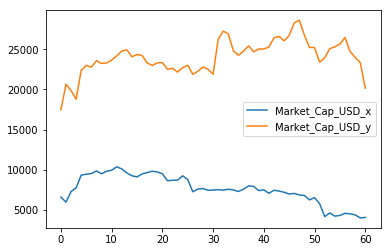

In [76]:
portfolio_two._get_numeric_data().plot()

### Writing files

In [78]:
excelbook = pd.ExcelWriter('output.xlsx')

In [79]:
portfolio_two.to_excel(excelbook, 'sheet1')
portfolio_two.to_excel(excelbook, 'sheet2')
excelbook.save()

pandas, overall, is one of the reason why Python is such a great software. 
There are many other interesting pandas features I could have shown, but it’s already enough to understand why a data scientist cannot do without pandas. To sum up, pandas is simple to use, hiding all the complex and abstract computations behind (generally) intuitive fast, if not the fastest data analysis package (it highly optimized in C) It is THE tool that helps a data scientist to quickly read and understand data and be more efficient at his role.